# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('D:/Extra Classes/Machine Learning/DataSets/FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
used_data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
used_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


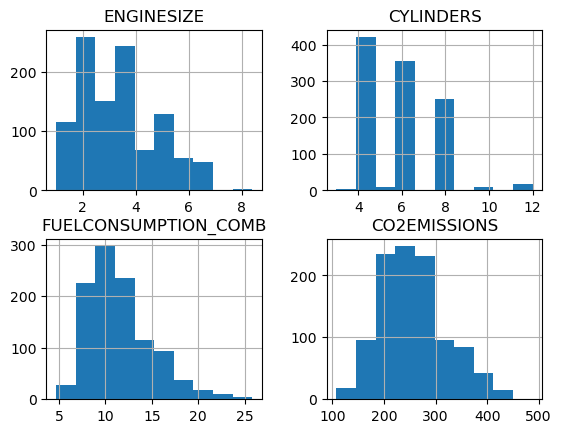

In [9]:
# histogram of data
used_data.hist()
plt.show()

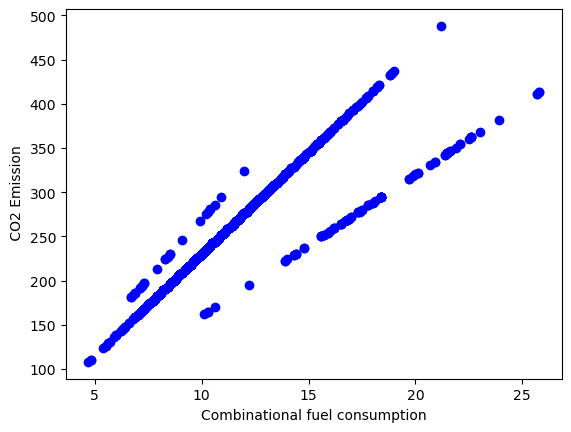

In [17]:
# plot CO2 emission as a function of combinational fuel consumption
plt.scatter(used_data.FUELCONSUMPTION_COMB, used_data.CO2EMISSIONS,  color='blue')
plt.xlabel("Combinational fuel consumption")
plt.ylabel(" CO2 Emission")
plt.show()

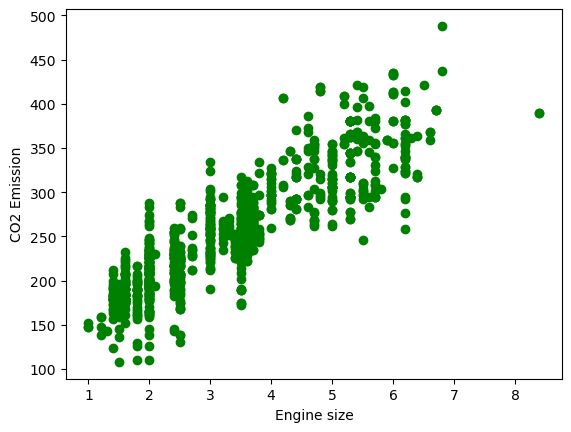

In [19]:
# plot CO2 emission as a function of Engine size
plt.scatter(used_data.ENGINESIZE, used_data.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

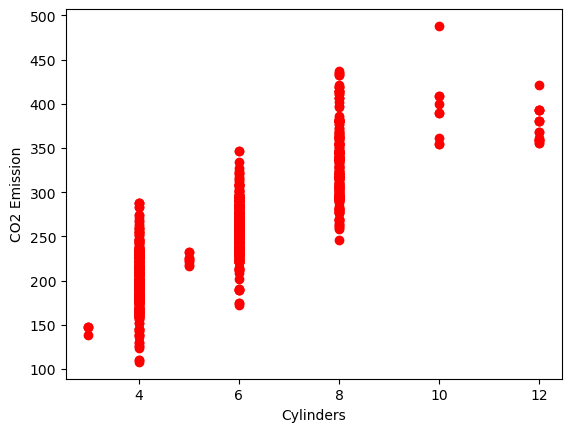

In [21]:
# plot CO2 emission as a function of Cylinders
plt.scatter(used_data.CYLINDERS, used_data.CO2EMISSIONS,  color='red')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

In [29]:
x_data = used_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_data = used_data[['CO2EMISSIONS']]

In [31]:
# preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

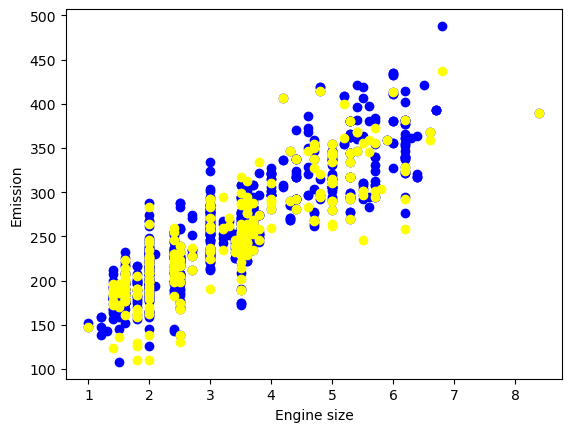

In [35]:
# plot distribution of test and train data
fig= plt.figure()
ax= fig.add_subplot()
ax.scatter(x_train.ENGINESIZE, y_train.CO2EMISSIONS,  color='blue')
ax.scatter(x_test.ENGINESIZE, y_test.CO2EMISSIONS,  color='yellow')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [39]:
# fit linear model on train data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
train_x = np.asanyarray(x_train[['ENGINESIZE']])
train_y = np.asanyarray(y_train[['CO2EMISSIONS']])
LR.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', LR.coef_)
print ('Intercept: ', LR.intercept_)

Coefficients:  [[39.40232724]]
Intercept:  [126.10080983]


Text(0, 0.5, 'Emission')

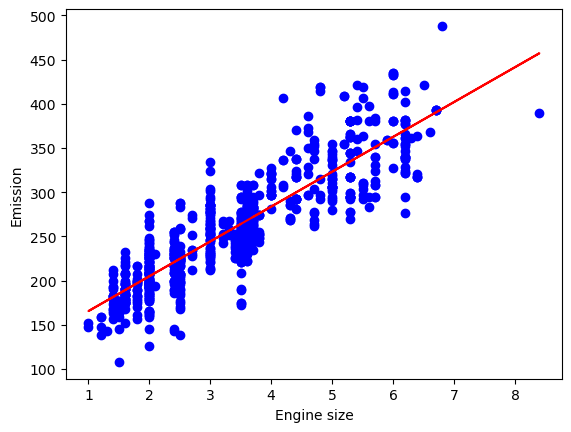

In [51]:
# plot predicted line and real data
plt.scatter(x_train.ENGINESIZE, y_train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, LR.coef_[0][0]*train_x + LR.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [65]:
# score of the model
from sklearn.metrics import r2_score

test_x = np.asanyarray(x_test[['ENGINESIZE']])
test_y = np.asanyarray(y_test[['CO2EMISSIONS']])
test_y_ = LR.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.60
Residual sum of squares (MSE): 1139.99
R2-score: 0.72


# Multiple linear regression


In [68]:
# Multiple linear regression model
MLR = LinearRegression()
train_x2 = np.asanyarray(x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(y_train[['CO2EMISSIONS']])
MLR.fit(train_x2, train_y2)
# The coefficients
print ('Coefficients: ', MLR.coef_)
print ('intercept: ', MLR.intercept_)

Coefficients:  [[11.89754098  7.55142712  9.10245142]]
intercept:  [68.40582598]


In [70]:
# prediction of Multiple linear regression model
y_hat = MLR.predict(x_test)
test_x2 = np.asanyarray(x_test)
test_y2 = np.asanyarray(y_test)
print("Residual sum of squares: %.2f" % np.mean((y_hat - test_y2) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % MLR.score(test_x2, test_y2))
print(r2_score(y_hat,test_y2))

Residual sum of squares: 595.36
Variance score: 0.85
0.8270367858390238


C:\Users\Sadra\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
